**1.CARGAR DATOS**

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

def cargar_datos():
    df = pd.read_csv('Walmart_Sales.csv')
    return df
df = cargar_datos()
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05/02/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/02/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19/02/2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26/02/2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05/03/2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6432,45,28/09/2012,713173.95,0,64.88,3.997,192.013558,8.684
6433,45,05/10/2012,733455.07,0,64.89,3.985,192.170412,8.667
6434,45,12/10/2012,734464.36,0,54.47,4.000,192.327265,8.667
6435,45,19/10/2012,718125.53,0,56.47,3.969,192.330854,8.667


In [89]:

print("Primeros registros:")
(df.head())


Primeros registros:


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05/02/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/02/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19/02/2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26/02/2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05/03/2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [90]:

print("\nÚltimos registros:")
(df.tail())


Últimos registros:


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6432,45,28/09/2012,713173.95,0,64.88,3.997,192.013558,8.684
6433,45,05/10/2012,733455.07,0,64.89,3.985,192.170412,8.667
6434,45,12/10/2012,734464.36,0,54.47,4.000,192.327265,8.667
6435,45,19/10/2012,718125.53,0,56.47,3.969,192.330854,8.667
6436,45,26/10/2012,760281.43,0,58.85,3.882,192.308899,8.667


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6437 entries, 0 to 6436
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6437 non-null   int64  
 1   Date          6437 non-null   object 
 2   Weekly_Sales  6436 non-null   float64
 3   Holiday_Flag  6437 non-null   int64  
 4   Temperature   6437 non-null   float64
 5   Fuel_Price    6437 non-null   float64
 6   CPI           6437 non-null   float64
 7   Unemployment  6436 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.4+ KB


**2.LIMPIEZA DE DATOS**

In [92]:
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    1
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    1
dtype: int64


In [93]:
df.duplicated().sum()

np.int64(2)

In [94]:
df = df.drop_duplicates()
print(f"Número de registros después de eliminar duplicados: {len(df)}")

Número de registros después de eliminar duplicados: 6435


In [95]:

df.loc[:, 'Weekly_Sales'] = df['Weekly_Sales'].fillna(df['Weekly_Sales'].mean())
print(df['Weekly_Sales'].isnull().sum())  # Verificar que no hay valores faltantes

0


In [96]:
df = df.dropna()
print(f"Número de registros después de eliminar filas con valores faltantes: {len(df)}")

Número de registros después de eliminar filas con valores faltantes: 6434


In [97]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6434.000000,6.434000e+03,6434.000000,6434.000000,6434.00000,6434.000000,6434.000000
mean,22.997202,1.047018e+06,0.069941,60.663957,3.35856,171.575065,7.999317
std,12.987253,5.643648e+05,0.255067,18.446361,0.45904,39.358865,1.875984
min,1.000000,2.099862e+05,0.000000,-2.060000,2.47200,126.064000,3.879000
25%,12.000000,5.537447e+05,0.000000,47.445000,2.93300,131.735000,6.891000
50%,23.000000,9.608457e+05,0.000000,62.675000,3.44500,182.616521,7.874000
75%,34.000000,1.420282e+06,0.000000,74.945000,3.73500,212.745096,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.46800,227.232807,14.313000


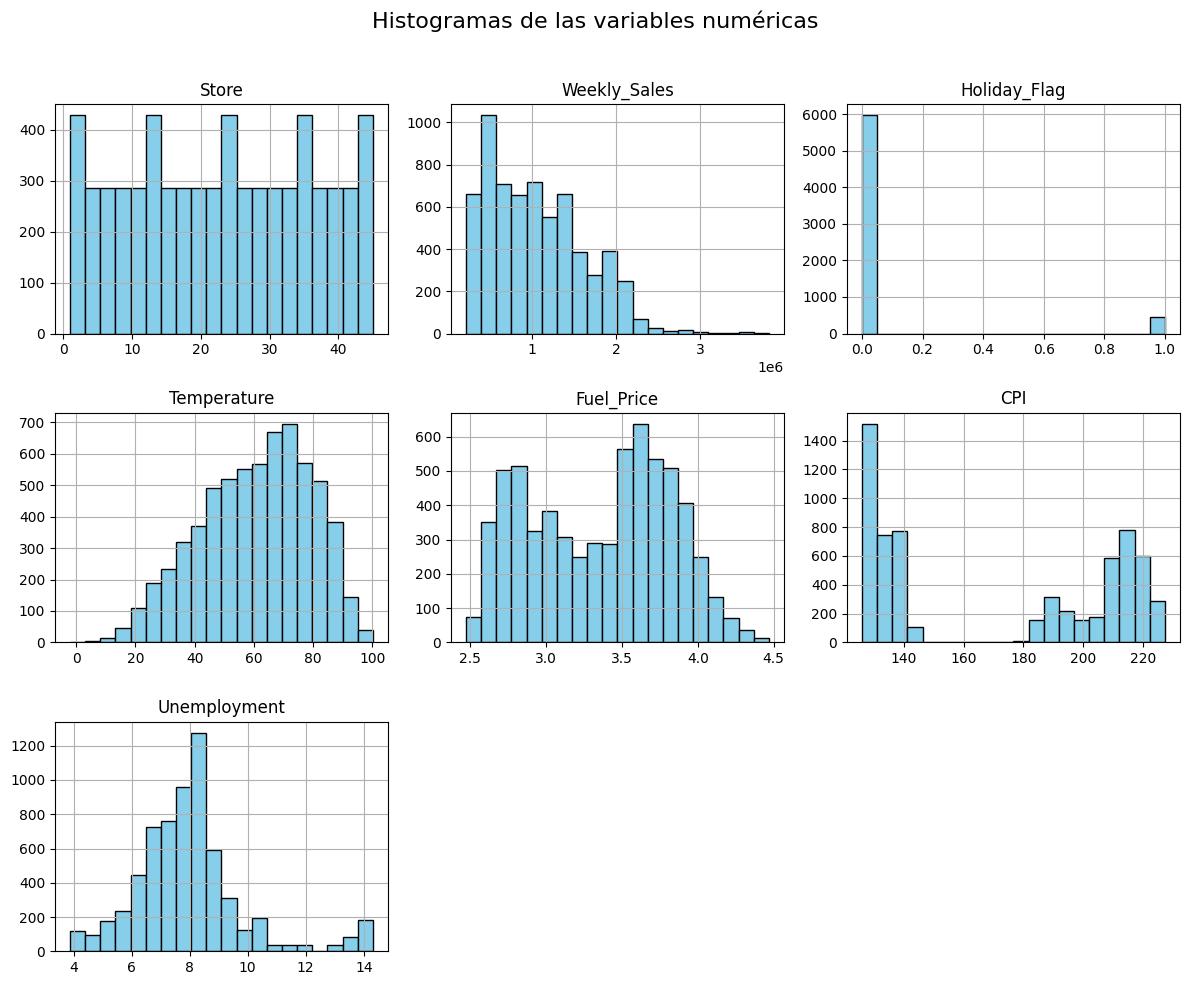

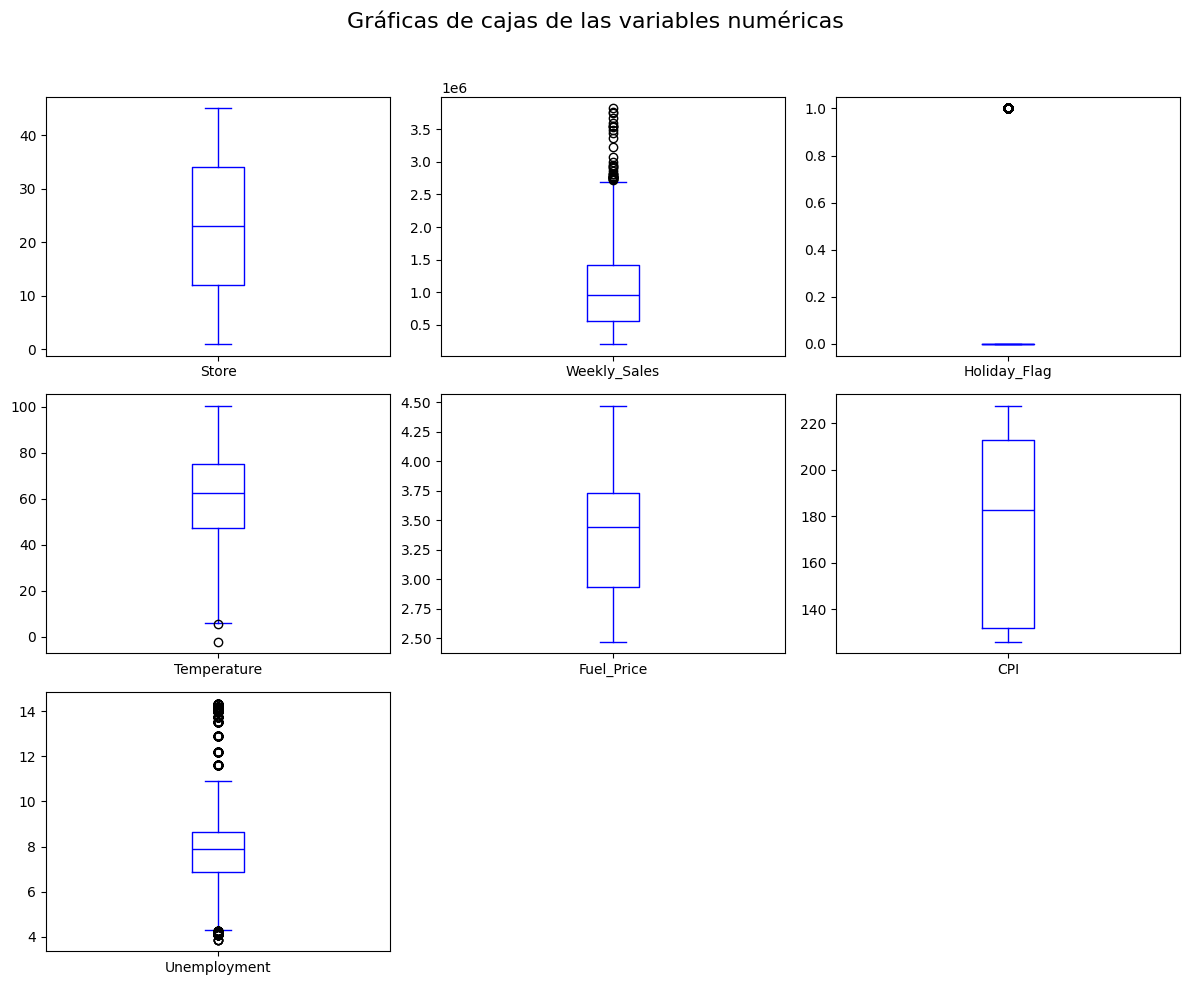

In [98]:
# Histograma de todas las variables numéricas
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histogramas de las variables numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Gráfica de cajas (boxplot) de todas las variables numéricas
df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 10), sharex=False, sharey=False, color='blue')
plt.suptitle('Gráficas de cajas de las variables numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [99]:
numeric_cols = df.select_dtypes(include=['number'])
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)
anomalías = df[outliers]
anomalías.to_csv('anomalías.csv', index=False)
df = df[~outliers]
print(f"Número de registros después de eliminar valores atípicos: {len(df)}")

Número de registros después de eliminar valores atípicos: 5508


**3.SELECCION DE ATRIBUTOS**

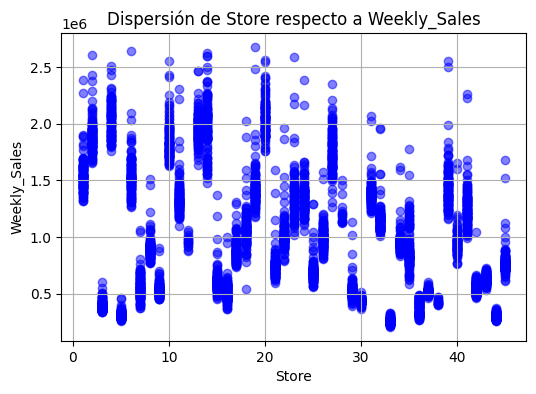

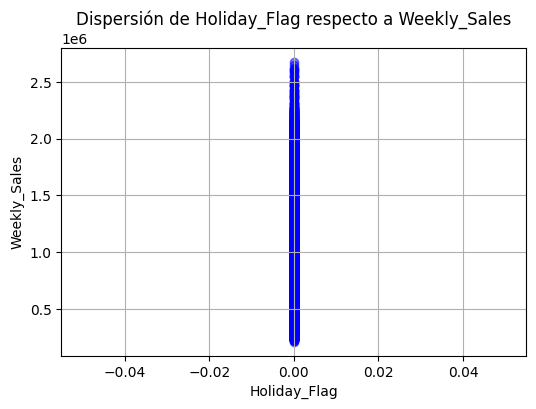

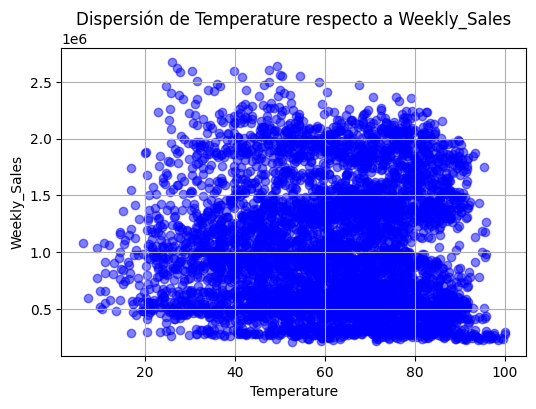

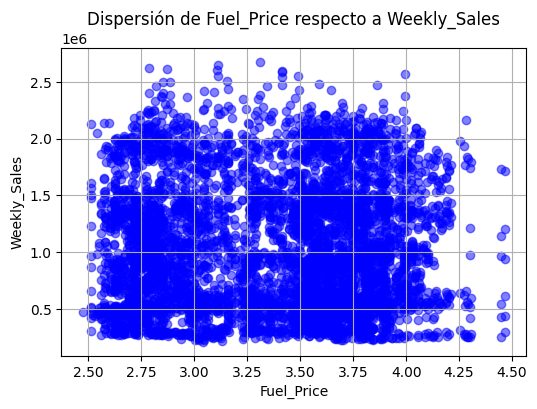

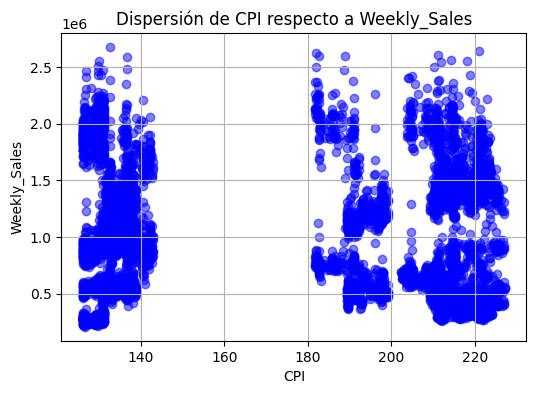

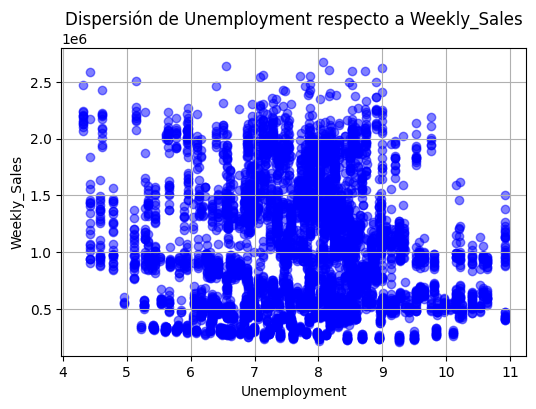

In [105]:
for column in numeric_cols.columns:
    if column != 'Weekly_Sales':  
        plt.figure(figsize=(8, 6))
        plt.scatter(df[column], df['Weekly_Sales'], alpha=0.5, color='blue')
        plt.title(f'Dispersión de {column} respecto a Weekly_Sales')
        plt.xlabel(column)
        plt.ylabel('Weekly_Sales')
        plt.grid(True)
        plt.gcf().set_size_inches(6, 4)  # Ajustar el tamaño de las gráficas
        plt.show()

In [106]:
atributosSinRelacion = df[['Store', 'Date', 'Holiday_Flag']]
atributosSinRelacion.to_csv('atributosSinRelacion.csv', index=False)
df = df.drop(columns=['Store', 'Date', 'Holiday_Flag'])
print("Atributos sin relación separados y guardados.")

Atributos sin relación separados y guardados.


In [107]:
df

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1643690.90,42.31,2.572,211.096358,8.106
2,1611968.17,39.93,2.514,211.289143,8.106
3,1409727.59,46.63,2.561,211.319643,8.106
4,1554806.68,46.50,2.625,211.350143,8.106
5,1439541.59,57.79,2.667,211.380643,8.106
...,...,...,...,...,...
6432,713173.95,64.88,3.997,192.013558,8.684
6433,733455.07,64.89,3.985,192.170412,8.667
6434,734464.36,54.47,4.000,192.327265,8.667
6435,718125.53,56.47,3.969,192.330854,8.667


In [108]:
correlation_threshold = 0.5
correlations = df.corr()['Weekly_Sales'].drop('Weekly_Sales')
related_attributes = correlations[abs(correlations) > correlation_threshold].index.tolist()
df = df.drop(columns=related_attributes)
print(f"Atributos eliminados por relación con la variable dependiente: {related_attributes}")

Atributos eliminados por relación con la variable dependiente: []


In [113]:
df


,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1643690.90,42.31,2.572,211.096358,8.106
2,1611968.17,39.93,2.514,211.289143,8.106
3,1409727.59,46.63,2.561,211.319643,8.106
4,1554806.68,46.50,2.625,211.350143,8.106
5,1439541.59,57.79,2.667,211.380643,8.106
...,...,...,...,...,...
6432,713173.95,64.88,3.997,192.013558,8.684
6433,733455.07,64.89,3.985,192.170412,8.667
6434,734464.36,54.47,4.000,192.327265,8.667
6435,718125.53,56.47,3.969,192.330854,8.667
